<h1>Fundamentals of Descriptive Statistics</h1

<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from matplotlib.ticker import PercentFormatter

<h2>I. Graphs and tables for categorical data</h2>

<h3>Data</h3>

In [2]:
car_unit = pd.DataFrame(data= {'Brands': ['Audi', 'BMW', 'Mercedes', 'Tata'],\
                        'Units': [124, 96, 113, 567]})
car_unit

,Brands,Units
0,Audi,124
1,BMW,96
2,Mercedes,113
3,Tata,567


<h3>Bar Graph- use Seaborn</h3>

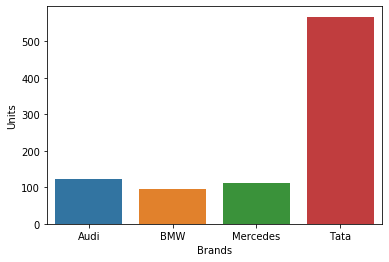

In [3]:
sb.barplot(car_unit['Brands'], car_unit['Units'])

<h3>Bar Graph- use Pandas</h3>

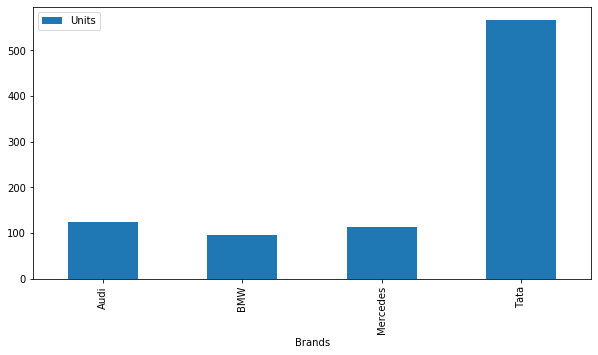

In [4]:
 car_unit.plot(kind= 'bar', y='Units', x= 'Brands', figsize=(10, 5), legend = True)

<h3>Relative Frequency Table</h3>

In [5]:
relative_freq = car_unit['Units']*(100/car_unit['Units'].sum())
relative_freq.name= 'Relative Freq'
car_unit_rf= pd.concat([car_unit, relative_freq], axis=1)
car_unit_rf

,Brands,Units,Relative Freq
0,Audi,124,13.777778
1,BMW,96,10.666667
2,Mercedes,113,12.555556
3,Tata,567,63.000000


<h3>Pie Chart-use matplotlib</h3>
1. autopct='%1.1f%%' -> auto percent(calculates relative frequency percent )

[0.   0.   0.   0.05]
0    13.777778
1    10.666667
2    12.555556
3    63.000000
Name: Relative Freq, dtype: float64


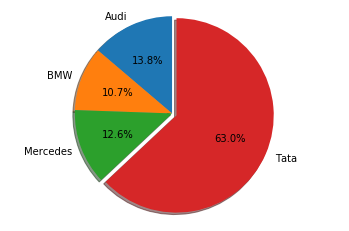

In [6]:
#exploding biggest Chunk
explode = (np.zeros(len(car_unit_rf['Relative Freq'] )))
explode[car_unit_rf['Relative Freq'].argmax()]= 0.05
print(explode)
print(car_unit_rf['Relative Freq'])
fig1, ax1 = plt.subplots()
ax1.pie(car_unit_rf['Units'] ,explode= explode, labels=car_unit_rf['Brands'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<h3>Pie Chart-use pandas</h3>

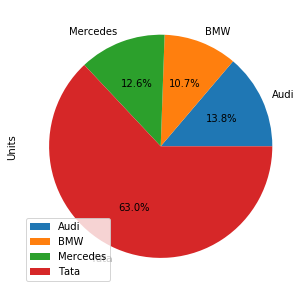

In [7]:
car_unit_rf.plot(kind= 'pie', labels=car_unit_rf['Brands'],\
                 y='Units', autopct='%1.1f%%', \
                 figsize=(5, 15), legend = True)

<h3>Cumulative Frequency</h3>
-> Also sort in descending order wrt. Units

In [8]:

car_unit_cf = car_unit.sort_values(by='Units',ascending=False)

relative_freq= car_unit_cf['Units']*(100/car_unit_cf['Units'].sum())
cum_freq= relative_freq.cumsum()
cum_freq.name = 'Cumulative Freq'
car_unit_cf= pd.concat([car_unit_cf, cum_freq], axis= 1)
car_unit_cf

,Brands,Units,Cumulative Freq
3,Tata,567,63.000000
0,Audi,124,76.777778
2,Mercedes,113,89.333333
1,BMW,96,100.000000


<h3>Pareto Chart</h3>

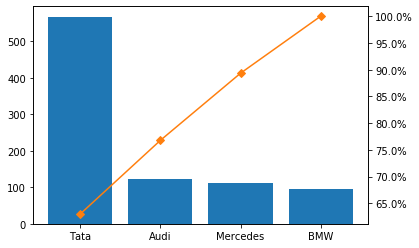

In [9]:
fig, ax = plt.subplots()
ax.bar(car_unit_cf['Brands'], car_unit_cf['Units'])
ax2= ax.twinx()
ax2.plot(car_unit_cf['Brands'], car_unit_cf['Cumulative Freq'], marker="D",  color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())

<h2>II. Graphs and tables for Numerical data</h2>

<h3>Data</h3>
1. We have a series of 20 numbers between 1 to 100, where every number is unique<br>
2. intervals width decided by -><br>
( [max value] - [min_value]) / desired number of interval

In [10]:
s1= pd.Series(data= [1,9,22,24,32,33,41,44,57,66,70,73,75,76,79,82,87,89,95,100])
s2 = pd.cut(s1, [0,20,40,60,80,100])
df= pd.concat([s1,s2], axis= 1)
df1 = df.groupby(1).count()
df1.index.name= 'Age Group'
df1

,0
Age Group,
"(0, 20]",2
"(20, 40]",4
"(40, 60]",3
"(60, 80]",6
"(80, 100]",5


<h3>Histogram- use pandas</h3>

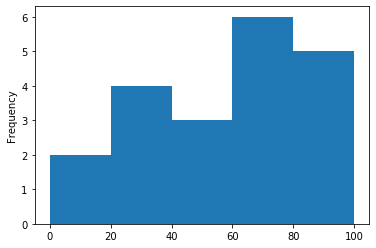

In [11]:
s1.plot(kind= 'hist', bins=[0,20,40,60,80,100])

<h3>Histogram- use seaborn</h3>

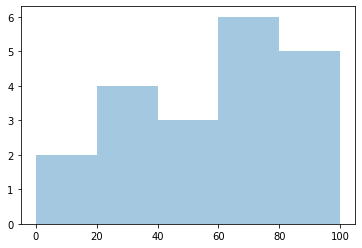

In [12]:
sb.distplot(s1,bins=[0,20,40,60,80,100], kde = False)

<h2>III.Relationship between variables-categorical</h2>

<h3>Data</h3>

In [13]:
invest = pd.DataFrame(data= {'Investor A': [124, 96, 113],\
                        'Investor B': [224, 16, 310],\
                        'Investor C': [24, 116, 10],\
                            }, index= ['Stocks', 'Bonds', 'Real Estate']\
                        )
invest

,Investor A,Investor B,Investor C
Stocks,124,224,24
Bonds,96,16,116
Real Estate,113,310,10


<h3>Cross Table</h3>

In [14]:
invest['Sum']= invest.sum(axis=1)
investor_tot = invest.sum(axis= 0)
investor_tot.name= 'Sum'

invest= invest.append(investor_tot)
invest


,Investor A,Investor B,Investor C,Sum
Stocks,124,224,24,372
Bonds,96,16,116,228
Real Estate,113,310,10,433
Sum,333,550,150,1033


<h3>Side By Side Bar- Use Pandas</h3>

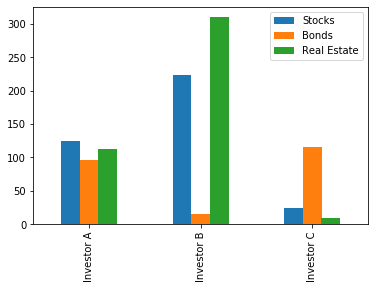

In [15]:
invest.iloc[:-1,:-1].T.plot.bar()
plt.show()

<h2>IV.Relationship between variables-Numerical</h2>

<h3>Data</h3>

In [16]:
df= pd.read_excel('dataset/stock_prize.xlsx')
df

,Date,Apple (AAPL),Alphabet (GOOGL),Bank of America (BAC)
0,2017-01-03,116.15,808.01,22.53
1,2017-01-04,116.02,807.77,22.95
2,2017-01-05,116.61,813.02,22.68
3,2017-01-06,117.91,825.21,22.68
4,2017-01-09,118.99,827.18,22.55
...,...,...,...,...
99,2017-05-25,153.87,991.86,23.25
100,2017-05-26,153.61,993.27,23.24
101,2017-05-30,153.67,996.17,22.91
102,2017-05-31,152.76,987.09,22.41


<h3>Scatter Plot- use MatPlotLib</h3>

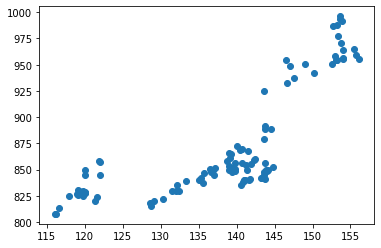

In [17]:
plt.scatter(df['Apple (AAPL)'], df['Alphabet (GOOGL)'])

<h3>Scatter Plot- use Seaborn</h3>

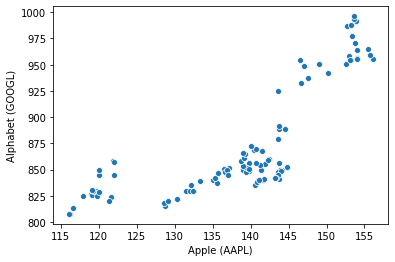

In [18]:
sb.scatterplot(df['Apple (AAPL)'], df['Alphabet (GOOGL)'])